## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [2]:
print(x_train.shape[0])
print(y_train.shape[0])
print(x_test.shape[0])
print(y_test.shape[0])



60000
60000
10000
10000


In [3]:
""

''

### Find dimensions of an image in the dataset

In [4]:
print(x_train.shape[1:3])
print(x_test.shape[1:3])

(28, 28)
(28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
from  keras.utils import to_categorical

In [6]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [9]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.callbacks import EarlyStopping 

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
 callback=EarlyStopping(monitor='loss',patience=5)

model.compile(optimizer='adam' , loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3777 - accuracy: 0.8640
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2318 - accuracy: 0.9142
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1686 - accuracy: 0.9376
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1202 - accuracy: 0.9550
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0829 - accuracy: 0.9691
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0565 - accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.9866
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9896
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0266 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [11]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
 callback=EarlyStopping(monitor='loss',patience=5)

model.compile(optimizer='adam' , loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10,callbacks=[callback])




Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3931 - accuracy: 0.8581
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2613 - accuracy: 0.9036
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2123 - accuracy: 0.9218
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1766 - accuracy: 0.9346
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1493 - accuracy: 0.9438
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1268 - accuracy: 0.9520
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1081 - accuracy: 0.9595
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0934 - accuracy: 0.9645
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0830 - accuracy: 0.9693
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.070

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2,rotation_range=30,shear_range=0.2,zoom_range=0.3)

AttributeError: ignored

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

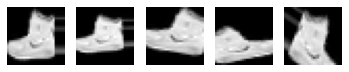

In [13]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [14]:
model.fit_generator(
    datagen.flow(x_train, y_train, batch_size = 3000), 
    validation_data = (x_test, y_test),
    steps_per_epoch = len(x_train) // 3000, 
    epochs = 10, 
    callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 12s 616ms/step - loss: 2.6587 - accuracy: 0.2746 - val_loss: 1.0444 - val_accuracy: 0.6931
Epoch 2/10
20/20 [==============================] - 13s 637ms/step - loss: 1.6491 - accuracy: 0.3980 - val_loss: 0.5269 - val_accuracy: 0.8188
Epoch 3/10
20/20 [==============================] - 13s 633ms/step - loss: 1.2692 - accuracy: 0.5290 - val_loss: 0.5321 - val_accuracy: 0.8121
Epoch 4/10
20/20 [==============================] - 13s 636ms/step - loss: 1.1115 - accuracy: 0.5888 - val_loss: 0.5442 - val_accuracy: 0.8080
Epoch 5/10
20/20 [==============================] - 13s 633ms/step - loss: 1.0408 - accuracy: 0.6158 - val_loss: 0.5350 - val_accuracy: 0.8104
Epoch 6/10
20/20 [==============================] - 13s 633ms/step - loss: 0.9875 - accuracy: 0.6352 - val_loss: 0.5407 - val_accuracy: 0.8069
Epoch 7/10
20/20 [==============================] - 13s 634ms/step

###  Report the final train and validation accuracy

In [17]:
 model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4890 - accuracy: 0.8217


[0.48900261521339417, 0.8217166662216187]

In [18]:
 model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.8096


[0.539456307888031, 0.8095999956130981]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [19]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np

### **Load CIFAR10 dataset**

In [20]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data() # fetch CIFAR-10 data

170500096/170498071 [==============================] - 2s 0us/step


In [21]:
X_train_cifar = X_train_cifar.astype('float32')
X_test_cifar = X_test_cifar.astype('float32')
X_train_cifar /= 255
X_test_cifar /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [30]:
datagen_cifar = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=30)

### **Prepare/fit the generator.**

In [31]:
datagen_cifar.fit(X_train_cifar)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

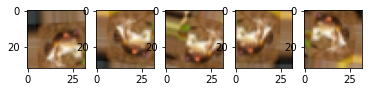

In [32]:
gen = datagen_cifar.flow(X_train_cifar[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("on")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()